In [4]:
import pandas as pd
import json
import os 
import sys
import csv

# plot
import matplotlib.pyplot as plt
import seaborn as sns

### global variables for running the code

In [5]:
run_timesteps = 5000

In [6]:
# Load NIFTY-50 data from single CSV file
# The CSV file contains data for all stocks from 2010-01-01 to 2022-12-31
# Columns: date, tic, open, high, low, close, volume

# Note: Original code loaded multiple CSV files (one per stock) from a directory
# This has been replaced with a single consolidated CSV file for easier data management

In [7]:
# Load the single CSV file containing all NIFTY-50 stock data
df = pd.read_csv('nifty50_daily_2010-01-01_to_2022-12-31.csv')

# Display basic information about the loaded data
print(f"Data shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Number of unique stocks: {df['tic'].nunique()}")
print(f"Unique stock tickers: {sorted(df['tic'].unique())}")

Data shape: (153177, 7)
Columns: ['date', 'tic', 'open', 'high', 'low', 'close', 'volume']
Date range: 2010-01-04 00:00:00+05:30 to 2022-12-30 00:00:00+05:30
Number of unique stocks: 49
Unique stock tickers: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HDFCLIFE', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBILIFE', 'SBIN', 'SUNPHARMA', 'TATACONSUM', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO', 'UPL', 'WIPRO']


In [8]:
# Data is already loaded in df from the previous cell
# No concatenation needed since we loaded a single CSV file

# Display first few rows to verify data structure
df.head()

,date,tic,open,high,low,close,volume
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510


In [9]:
df.shape

(153177, 7)

In [10]:
df

,date,tic,open,high,low,close,volume
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510
...,...,...,...,...,...,...,...
153172,2022-12-30 00:00:00+05:30,TECHM,932.467230,936.934707,925.401357,926.677795,1317151
153173,2022-12-30 00:00:00+05:30,TITAN,2539.741028,2585.305805,2528.894679,2572.924072,1057182
153174,2022-12-30 00:00:00+05:30,ULTRACEMCO,6883.440683,6935.607138,6834.519087,6843.172363,232317
153175,2022-12-30 00:00:00+05:30,UPL,707.240361,712.888923,694.774556,697.452759,1387568


In [11]:
# The new CSV file already has cleaned data with only necessary columns
# No need to drop extra columns as they don't exist in the new format
# Original code dropped: 'Series', 'Prev Close', 'Last', 'VWAP','Turnover','Trades',
#                        'Deliverable Volume','%Deliverble','Company Name','Industry','ISIN Code'

# If there are any unexpected columns in the CSV, you can uncomment and modify this:
# df.drop(['column_name'], axis=1, inplace=True)

print("Data already has clean columns:", df.columns.tolist())

Data already has clean columns: ['date', 'tic', 'open', 'high', 'low', 'close', 'volume']


In [12]:
df

,date,tic,open,high,low,close,volume
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510
...,...,...,...,...,...,...,...
153172,2022-12-30 00:00:00+05:30,TECHM,932.467230,936.934707,925.401357,926.677795,1317151
153173,2022-12-30 00:00:00+05:30,TITAN,2539.741028,2585.305805,2528.894679,2572.924072,1057182
153174,2022-12-30 00:00:00+05:30,ULTRACEMCO,6883.440683,6935.607138,6834.519087,6843.172363,232317
153175,2022-12-30 00:00:00+05:30,UPL,707.240361,712.888923,694.774556,697.452759,1387568


In [13]:
# The new CSV file already has the correct column names (date, tic, open, high, low, close, volume)
# No need to rename columns as they're already in the required format
# Original code renamed: 'Date'→'date', 'Symbol'→'tic', 'Open'→'open', etc.

# Verify columns are correct
print("Current columns:", df.columns.tolist())
expected_cols = ['date', 'tic', 'open', 'high', 'low', 'close', 'volume']
if set(expected_cols).issubset(set(df.columns)):
    print("All expected columns are present!")
else:
    print("Warning: Some expected columns may be missing")

Current columns: ['date', 'tic', 'open', 'high', 'low', 'close', 'volume']
All expected columns are present!


In [14]:
df

,date,tic,open,high,low,close,volume
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510
...,...,...,...,...,...,...,...
153172,2022-12-30 00:00:00+05:30,TECHM,932.467230,936.934707,925.401357,926.677795,1317151
153173,2022-12-30 00:00:00+05:30,TITAN,2539.741028,2585.305805,2528.894679,2572.924072,1057182
153174,2022-12-30 00:00:00+05:30,ULTRACEMCO,6883.440683,6935.607138,6834.519087,6843.172363,232317
153175,2022-12-30 00:00:00+05:30,UPL,707.240361,712.888923,694.774556,697.452759,1387568


In [15]:
df.shape

(153177, 7)

In [16]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'tic'])
df.shape

(153177, 7)

In [17]:
df = df.dropna(subset=['date', 'tic'])
df.shape

(153177, 7)

In [18]:
df

,date,tic,open,high,low,close,volume
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510
...,...,...,...,...,...,...,...
153172,2022-12-30 00:00:00+05:30,TECHM,932.467230,936.934707,925.401357,926.677795,1317151
153173,2022-12-30 00:00:00+05:30,TITAN,2539.741028,2585.305805,2528.894679,2572.924072,1057182
153174,2022-12-30 00:00:00+05:30,ULTRACEMCO,6883.440683,6935.607138,6834.519087,6843.172363,232317
153175,2022-12-30 00:00:00+05:30,UPL,707.240361,712.888923,694.774556,697.452759,1387568


In [19]:
nan_counts = df.isna().sum()
print(nan_counts)


date      0
tic       0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [20]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date        0
tic         0
open        0
high        0
low         0
close       0
volume    128
dtype: int64


In [21]:
df['tic'].value_counts()

tic
HCLTECH       3210
ADANIENT      3209
ADANIPORTS    3209
ASIANPAINT    3209
APOLLOHOSP    3209
BAJAJ-AUTO    3209
BAJAJFINSV    3209
BAJFINANCE    3209
AXISBANK      3209
BHARTIARTL    3209
BPCL          3209
CIPLA         3209
BRITANNIA     3209
DIVISLAB      3209
DRREDDY       3209
EICHERMOT     3209
GRASIM        3209
HDFCBANK      3209
HEROMOTOCO    3209
HINDALCO      3209
HINDUNILVR    3209
ICICIBANK     3209
INDUSINDBK    3209
INFY          3209
ITC           3209
JSWSTEEL      3209
KOTAKBANK     3209
LT            3209
M&M           3209
MARUTI        3209
NESTLEIND     3209
NTPC          3209
ONGC          3209
POWERGRID     3209
RELIANCE      3209
SBIN          3209
SUNPHARMA     3209
TATACONSUM    3209
TATAMOTORS    3209
TATASTEEL     3209
TCS           3209
TECHM         3209
TITAN         3209
ULTRACEMCO    3209
UPL           3209
WIPRO         3209
COALINDIA     2998
SBILIFE       1298
HDFCLIFE      1266
Name: count, dtype: int64

In [22]:
import pandas as pd

# Get the value counts of the 'tic' column
tic_counts = df['tic'].value_counts(dropna=False)

# Convert the counts to a DataFrame
tic_counts_df = tic_counts.reset_index()
tic_counts_df.columns = ['Tic', 'Count']

# Save the DataFrame to a CSV file
# tic_counts_df.to_csv('tic_value_counts.csv', index=False)

print(tic_counts)


tic
HCLTECH       3210
ADANIENT      3209
ADANIPORTS    3209
ASIANPAINT    3209
APOLLOHOSP    3209
BAJAJ-AUTO    3209
BAJAJFINSV    3209
BAJFINANCE    3209
AXISBANK      3209
BHARTIARTL    3209
BPCL          3209
CIPLA         3209
BRITANNIA     3209
DIVISLAB      3209
DRREDDY       3209
EICHERMOT     3209
GRASIM        3209
HDFCBANK      3209
HEROMOTOCO    3209
HINDALCO      3209
HINDUNILVR    3209
ICICIBANK     3209
INDUSINDBK    3209
INFY          3209
ITC           3209
JSWSTEEL      3209
KOTAKBANK     3209
LT            3209
M&M           3209
MARUTI        3209
NESTLEIND     3209
NTPC          3209
ONGC          3209
POWERGRID     3209
RELIANCE      3209
SBIN          3209
SUNPHARMA     3209
TATACONSUM    3209
TATAMOTORS    3209
TATASTEEL     3209
TCS           3209
TECHM         3209
TITAN         3209
ULTRACEMCO    3209
UPL           3209
WIPRO         3209
COALINDIA     2998
SBILIFE       1298
HDFCLIFE      1266
Name: count, dtype: int64


In [23]:
# Get the top 30 most frequent 'tic' values
top_30_tics = tic_counts.nlargest(30).index

# Filter the DataFrame to keep only these top 30 'tic' values
df_filtered = df[df['tic'].isin(top_30_tics)]

df = df_filtered.reset_index(drop=True)
# Display the filtered DataFrame
print(f"After filtering to top 30: {df.shape}")
print(f"Unique tickers: {df['tic'].nunique()}")
print(df)

After filtering to top 30: (96271, 7)
Unique tickers: 30
                            date         tic         open         high  \
0      2010-01-04 00:00:00+05:30    ADANIENT    55.390843    57.519310   
1      2010-01-04 00:00:00+05:30  ADANIPORTS   101.544425   102.971534   
2      2010-01-04 00:00:00+05:30  APOLLOHOSP   304.290836   337.325468   
3      2010-01-04 00:00:00+05:30  ASIANPAINT   155.626090   156.399441   
4      2010-01-04 00:00:00+05:30    AXISBANK   180.955634   182.057141   
...                          ...         ...          ...          ...   
96266  2022-12-30 00:00:00+05:30    JSWSTEEL   761.723505   766.157859   
96267  2022-12-30 00:00:00+05:30   KOTAKBANK  1819.504151  1832.364623   
96268  2022-12-30 00:00:00+05:30          LT  2055.723368  2073.218886   
96269  2022-12-30 00:00:00+05:30         M&M  1233.217447  1233.217447   
96270  2022-12-30 00:00:00+05:30      MARUTI  8223.515745  8242.933728   

               low        close   volume  
0        54

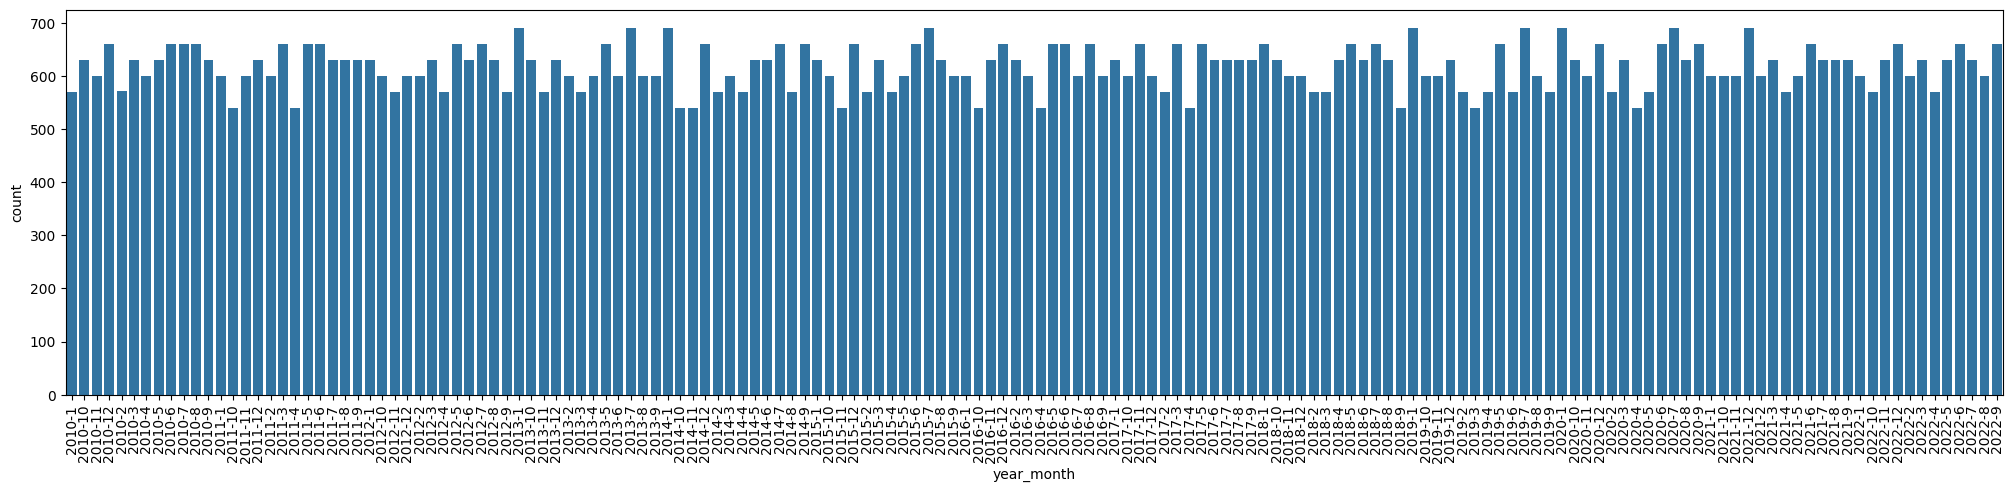

In [24]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [25]:
df['year'].value_counts()

year
2020    7530
2010    7501
2013    7440
2017    7440
2021    7440
2022    7440
2018    7380
2011    7380
2016    7380
2015    7380
2012    7350
2014    7320
2019    7290
Name: count, dtype: int64

In [26]:
import pandas as pd

# Ensure 'date' is properly converted to datetime
df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample days dynamically based on the number of unique days available in each year
for year, group in grouped_data:
    # Get the unique dates available for sampling
    unique_days = group['date'].nunique()
    print('ud '+ str(year)+ ' ' + str(unique_days))
    
    # Adjust the sample size based on the number of unique days
    sample_size = min(208, unique_days)  # Use smaller of 208 or the number of unique days
    
    # Sample unique days
    sampled_days = group['date'].sample(sample_size, replace=False)
    

    print('ss '+ str(year)+ ' ' + str(sample_size))

    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

print(len(sampled_data))


ud 2010 251
ss 2010 208
ud 2011 246
ss 2011 208
ud 2012 245
ss 2012 208
ud 2013 248
ss 2013 208
ud 2014 244
ss 2014 208
ud 2015 246
ss 2015 208
ud 2016 246
ss 2016 208
ud 2017 248
ss 2017 208
ud 2018 246
ss 2018 208
ud 2019 243
ss 2019 208
ud 2020 251
ss 2020 208
ud 2021 248
ss 2021 208
ud 2022 248
ss 2022 208
54660


In [27]:
# DIAGNOSTIC: Check data after sampling
print(f"df shape after cell 23: {df.shape}")
print(f"df unique tickers: {df['tic'].nunique()}")
print(f"sampled_data shape: {sampled_data.shape}")
print(f"sampled_data unique tickers: {sampled_data['tic'].nunique()}")

df shape after cell 23: (96271, 10)
df unique tickers: 30
sampled_data shape: (54660, 10)
sampled_data unique tickers: 30


In [28]:
# Count zeros in the 'Volume' column
zero_count_volume = (df['volume'] == 0).sum()

print("Number of zeros in 'Volume' column:", zero_count_volume)


Number of zeros in 'Volume' column: 90


In [29]:
# Count zeros in the 'Volume' column
zero_count_volume = (df['volume'] == 0).sum()

print("Number of zeros in 'Volume' column:", zero_count_volume)

# Install ALL FinRL dependencies in the current kernel
import sys
import subprocess

print("Installing missing dependencies...")

# First, force upgrade websockets to fix yfinance compatibility
print("Upgrading websockets...")
subprocess.check_call([sys.executable, "-m", "pip", "install", "websockets>=13.0", "--upgrade", "-q"])
print("✓ websockets upgraded")

packages = [
    "alpaca-trade-api", 
    "exchange-calendars", 
    "stockstats",
    "wrds",
    "pyfolio-reloaded",
    "alpaca-py",
    "yfinance"
]

for pkg in packages:
    try:
        print(f"Installing {pkg}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg, "-q"])
        print(f"✓ {pkg} installed")
    except Exception as e:
        print(f"✗ {pkg} warning: {e}")
        
print("\n=== All dependencies installed! ===")

Number of zeros in 'Volume' column: 90
Installing missing dependencies...
Upgrading websockets...


✓ websockets upgraded
Installing alpaca-trade-api...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.66 requires websockets>=13.0, but you have websockets 10.4 which is incompatible.


✓ alpaca-trade-api installed
Installing exchange-calendars...
✓ exchange-calendars installed
Installing stockstats...
✓ stockstats installed
Installing wrds...
✓ wrds installed
Installing pyfolio-reloaded...
✓ pyfolio-reloaded installed
Installing alpaca-py...
✓ alpaca-py installed
Installing yfinance...
✓ yfinance installed

=== All dependencies installed! ===


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
alpaca-trade-api 3.2.0 requires websockets<11,>=9.0, but you have websockets 15.0.1 which is incompatible.


In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

/home/ciaokitty/DRL-stonks/.venv/lib/python3.13/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [31]:
df.head()

,date,tic,open,high,low,close,volume,year,month,year_month
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224,2010,1,2010-1
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040,2010,1,2010-1
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604,2010,1,2010-1
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350,2010,1,2010-1
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510,2010,1,2010-1


In [32]:
df.drop(['year_month','month','year'], axis=1, inplace=True)


In [33]:
df

,date,tic,open,high,low,close,volume
0,2010-01-04 00:00:00+05:30,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224
1,2010-01-04 00:00:00+05:30,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040
2,2010-01-04 00:00:00+05:30,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604
3,2010-01-04 00:00:00+05:30,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350
4,2010-01-04 00:00:00+05:30,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510
...,...,...,...,...,...,...,...
96266,2022-12-30 00:00:00+05:30,JSWSTEEL,761.723505,766.157859,754.086561,756.845703,2190914
96267,2022-12-30 00:00:00+05:30,KOTAKBANK,1819.504151,1832.364623,1816.712809,1821.647583,2692688
96268,2022-12-30 00:00:00+05:30,LT,2055.723368,2073.218886,2022.773570,2027.341797,1189427
96269,2022-12-30 00:00:00+05:30,M&M,1233.217447,1233.217447,1213.384242,1217.477539,1372710


In [34]:
# Assuming 'df' is your DataFrame and 'close' is the column with closing prices
std_dev = df.groupby('tic')['close'].std()

plt.figure(figsize=(10,6))
sns.histplot(std_dev, bins=50, kde=True)
plt.title('Distribution of std of the stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
if os.name == 'nt':  # Windows
    # plt.savefig('Output\std_dev.png')
    do_nothing = 1
else:
    plt.savefig('Output/output_nifty.png')
plt.show()

/tmp/ipykernel_9455/3718713872.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [35]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [36]:
df.dtypes

date                datetime64[ns, UTC+05:30]
tic                                    object
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
day                                     int32
short_resistance                      float64
short_support                         float64
long_resistance                       float64
long_support                          float64
dtype: object

In [37]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [38]:
print(df.shape)
df.tail()

(96271, 12)


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,long_resistance,long_support
96266,2022-12-30,JSWSTEEL,761.723505,766.157859,754.086561,756.845703,2190914,4,2487.467733,298.120782,8203.126605,141.506806
96267,2022-12-30,KOTAKBANK,1819.504151,1832.364623,1816.712809,1821.647583,2692688,4,2487.467733,298.120782,8203.126605,141.506806
96268,2022-12-30,LT,2055.723368,2073.218886,2022.773570,2027.341797,1189427,4,2487.467733,298.120782,8203.126605,141.506806
96269,2022-12-30,M&M,1233.217447,1233.217447,1213.384242,1217.477539,1372710,4,2467.287544,298.120782,8203.126605,141.506806
96270,2022-12-30,MARUTI,8223.515745,8242.933728,8118.901362,8150.309570,433976,4,8242.933728,298.120782,8242.933728,144.777602


In [39]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

/tmp/ipykernel_9455/1344718701.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_price_pivot = df_price_pivot.pct_change()


3210


In [40]:
df = df.merge(turbulence_index, on="date")
print(f"After turbulence merge: {df.shape}")
print(f"Unique tickers: {df['tic'].nunique()}")
df['tic'].value_counts()

After turbulence merge: (96271, 13)
Unique tickers: 30


tic
HCLTECH       3210
ADANIENT      3209
APOLLOHOSP    3209
ASIANPAINT    3209
AXISBANK      3209
ADANIPORTS    3209
BAJAJFINSV    3209
BAJFINANCE    3209
BHARTIARTL    3209
BPCL          3209
BRITANNIA     3209
CIPLA         3209
DIVISLAB      3209
BAJAJ-AUTO    3209
DRREDDY       3209
EICHERMOT     3209
GRASIM        3209
HDFCBANK      3209
HEROMOTOCO    3209
HINDALCO      3209
HINDUNILVR    3209
ICICIBANK     3209
INDUSINDBK    3209
INFY          3209
ITC           3209
JSWSTEEL      3209
KOTAKBANK     3209
LT            3209
M&M           3209
MARUTI        3209
Name: count, dtype: int64

In [41]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

tic
HCLTECH       3210
ADANIENT      3209
APOLLOHOSP    3209
ASIANPAINT    3209
AXISBANK      3209
ADANIPORTS    3209
BAJAJFINSV    3209
BAJFINANCE    3209
BHARTIARTL    3209
BPCL          3209
BRITANNIA     3209
CIPLA         3209
DIVISLAB      3209
BAJAJ-AUTO    3209
DRREDDY       3209
EICHERMOT     3209
GRASIM        3209
HDFCBANK      3209
HEROMOTOCO    3209
HINDALCO      3209
HINDUNILVR    3209
ICICIBANK     3209
INDUSINDBK    3209
INFY          3209
ITC           3209
JSWSTEEL      3209
KOTAKBANK     3209
LT            3209
M&M           3209
MARUTI        3209
Name: count, dtype: int64

In [42]:
df = df[df['date'] <= '2020-12-31']
print(f"After date filter (<=2020-12-31): {df.shape}")
print(f"Unique tickers: {df['tic'].nunique()}")

# CRITICAL FIX: Ensure all stocks have the same dates
# Keep only dates that have data for ALL 30 stocks
dates_with_all_stocks = df.groupby('date').filter(lambda x: len(x) == 30)['date'].unique()
print(f"\nDates with all 30 stocks: {len(dates_with_all_stocks)}")

df = df[df['date'].isin(dates_with_all_stocks)]
print(f"After ensuring all stocks on all dates: {df.shape}")
print(f"Rows per ticker: {df['tic'].value_counts().unique()}")  # Should all be the same
print(f"Tickers: {sorted(df['tic'].unique())}")
# df

After date filter (<=2020-12-31): (81391, 14)
Unique tickers: 30

Dates with all 30 stocks: 2713
After ensuring all stocks on all dates: (81390, 14)
Rows per ticker: [2713]
Tickers: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI']


In [43]:
# Check data completeness before feature engineering
print("Before feature engineering:")
print(f"df shape: {df.shape}")
print(f"Unique tickers: {df['tic'].nunique()}")
print(f"\nRows per ticker:")
print(df['tic'].value_counts().sort_index())
print(f"\nDate range per ticker:")
for tic in sorted(df['tic'].unique())[:5]:  # Check first 5
    tic_data = df[df['tic'] == tic]
    print(f"{tic}: {tic_data['date'].min()} to {tic_data['date'].max()}, {len(tic_data)} rows")

fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)

print(f"\nAfter feature engineering: {processed.shape}")
print(f"Unique tickers in processed: {processed['tic'].nunique()}")
print(f"Tickers remaining: {sorted(processed['tic'].unique())}")

Before feature engineering:
df shape: (81390, 14)
Unique tickers: 30

Rows per ticker:
tic
ADANIENT      2713
ADANIPORTS    2713
APOLLOHOSP    2713
ASIANPAINT    2713
AXISBANK      2713
BAJAJ-AUTO    2713
BAJAJFINSV    2713
BAJFINANCE    2713
BHARTIARTL    2713
BPCL          2713
BRITANNIA     2713
CIPLA         2713
DIVISLAB      2713
DRREDDY       2713
EICHERMOT     2713
GRASIM        2713
HCLTECH       2713
HDFCBANK      2713
HEROMOTOCO    2713
HINDALCO      2713
HINDUNILVR    2713
ICICIBANK     2713
INDUSINDBK    2713
INFY          2713
ITC           2713
JSWSTEEL      2713
KOTAKBANK     2713
LT            2713
M&M           2713
MARUTI        2713
Name: count, dtype: int64

Date range per ticker:
ADANIENT: 2010-01-04 to 2020-12-31, 2713 rows
ADANIPORTS: 2010-01-04 to 2020-12-31, 2713 rows
APOLLOHOSP: 2010-01-04 to 2020-12-31, 2713 rows
ASIANPAINT: 2010-01-04 to 2020-12-31, 2713 rows
AXISBANK: 2010-01-04 to 2020-12-31, 2713 rows
Successfully added technical indicators

After featur

In [44]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)



Successfully added technical indicators


In [45]:
# df.shape
nan_counts = df.isna().sum()
print(nan_counts)


date                0
tic                 0
open                0
high                0
low                 0
close               0
volume              0
day                 0
short_resistance    0
short_support       0
long_resistance     0
long_support        0
turbulence_x        0
turbulence_y        0
dtype: int64


In [46]:
print("Creating date-ticker combinations...")
list_ticker = processed["tic"].unique().tolist()
print(f"Number of tickers: {len(list_ticker)}")
# Use only dates that exist in processed (trading days only)
list_date = processed['date'].unique().tolist()
print(f"Number of dates: {len(list_date)}")
combination = list(itertools.product(list_date, list_ticker))
print(f"Total combinations: {len(combination)}")
print("Merging with processed data...")
processed_full = pd.DataFrame(combination, columns=["date","tic"]).merge(processed, on=["date","tic"], how="left")
processed_full = processed_full.sort_values(['date','tic'])
processed_full = processed_full.fillna(0)
print(f"Final processed_full shape: {processed_full.shape}")
print(f"Unique tickers: {processed_full['tic'].nunique()}")


Creating date-ticker combinations...
Number of tickers: 30
Number of dates: 2713
Total combinations: 81390
Merging with processed data...
Final processed_full shape: (81390, 22)
Unique tickers: 30


In [47]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)



In [48]:
tic_count = processed_full['tic'].nunique()

In [49]:
print(processed_full.shape)
print(f"Number of unique tickers in processed_full: {processed_full['tic'].nunique()}")
print(f"Unique tickers: {sorted(processed_full['tic'].unique())}")
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(81390, 22)
Number of unique tickers in processed_full: 30
Unique tickers: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI']


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,turbulence_x,turbulence_y,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2010-01-04,ADANIENT,55.390843,57.519310,54.858728,57.215244,1860224.0,0.0,57.519310,54.858728,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,57.215244,57.215244
1,2010-01-04,ADANIPORTS,101.544425,102.971534,101.269978,101.864609,1079040.0,0.0,102.971534,54.858728,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,101.864609,101.864609
2,2010-01-04,APOLLOHOSP,304.290836,337.325468,301.126961,323.041473,563604.0,0.0,337.325468,54.858728,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,323.041473,323.041473
3,2010-01-04,ASIANPAINT,155.626090,156.399441,154.670258,155.421890,80350.0,0.0,337.325468,54.858728,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,155.421890,155.421890
4,2010-01-04,AXISBANK,180.955634,182.057141,179.899647,180.627914,4371510.0,0.0,337.325468,54.858728,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,180.627914,180.627914
5,2010-01-04,BAJAJ-AUTO,589.171262,591.825020,575.835646,578.172302,381510.0,0.0,591.825020,54.858728,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,578.172302,578.172302
6,2010-01-04,BAJAJFINSV,33.753732,34.893509,33.444640,34.719643,2469924.0,0.0,591.825020,33.444640,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,34.719643,34.719643
7,2010-01-04,BAJFINANCE,2.936317,3.043991,2.936317,3.028105,4660649.0,0.0,591.825020,2.936317,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,3.028105,3.028105
8,2010-01-04,BHARTIARTL,273.937539,275.806119,268.954574,270.075745,3275801.0,0.0,591.825020,2.936317,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,270.075745,270.075745
9,2010-01-04,BPCL,25.575018,26.462326,25.432162,26.186676,8574492.0,0.0,591.825020,2.936317,...,0.0,0.0,0.0,59.749578,56.004866,100.0,66.666667,100.0,26.186676,26.186676


In [50]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [51]:
# Get the minimum date value from the 'date' column
min_date = processed_full['date'].min()
print(f"Minimum Date: {min_date}")

# Get the maximum date value from the 'date' column
max_date = processed_full['date'].max()
print(f"Maximum Date: {max_date}")



Minimum Date: 2010-01-04
Maximum Date: 2020-12-31


In [52]:
TRAIN_START_DATE = '2000-01-03'
TRAIN_END_DATE = '2016-12-31'
TRADE_START_DATE = '2017-01-01'
TRADE_END_DATE = '2021-04-30'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

51750
29640


In [53]:
stock_dimension = len(train.tic.unique())
# print(stock_dimension)

state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [54]:
buy_cost_list = sell_cost_list = [0.0005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 2000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
    # "cash_penalty_percentage": 0.1,
    # "exponential_cash_average": 0.04
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [55]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [56]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [57]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/NIFTY/a2c


In [58]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=run_timesteps) if if_using_a2c else None

-------------------------------------
| time/                 |           |
|    fps                | 200       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -42.6     |
|    explained_variance | 0.027     |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | -391      |
|    reward             | 3.8931763 |
|    std                | 1         |
|    value_loss         | 88        |
-------------------------------------
--------------------------------------
| time/                 |            |
|    fps                | 202        |
|    iterations         | 200        |
|    time_elapsed       | 4          |
|    total_timesteps    | 1000       |
| train/                |            |
|    entropy_loss       | -42.5      |
|    explained_variance | 0          |
|    learning_rate      | 0.0007     |
| 

In [59]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/NIFTY/ddpg


In [60]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=run_timesteps) if if_using_ddpg else None

In [61]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/NIFTY/ppo


In [62]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=run_timesteps) if if_using_ppo else None

----------------------------------
| time/              |           |
|    fps             | 212       |
|    iterations      | 1         |
|    time_elapsed    | 9         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 3.2404032 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 211         |
|    iterations           | 2           |
|    time_elapsed         | 19          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014569732 |
|    clip_fraction        | 0.2         |
|    clip_range           | 0.2         |
|    entropy_loss         | -42.6       |
|    explained_variance   | 0.00726     |
|    learning_rate        | 0.00025     |
|    loss                 | 50.7        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0214     |
|    reward  

In [63]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 100000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 100000, 'learning_rate': 0.001}
Using cpu device
Logging to results/NIFTY/td3


In [64]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=run_timesteps) if if_using_td3 else None

In [65]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/NIFTY/sac


In [66]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=run_timesteps) if if_using_sac else None

In [67]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

# Check if turbulence column exists
print(f"insample_risk_indicator shape: {insample_risk_indicator.shape}")
print(f"Columns: {insample_risk_indicator.columns.tolist()}")
print(f"Has turbulence column: {'turbulence' in insample_risk_indicator.columns}")

insample_risk_indicator shape: (1725, 22)
Columns: ['date', 'tic', 'open', 'high', 'low', 'close', 'volume', 'day', 'short_resistance', 'short_support', 'long_resistance', 'long_support', 'turbulence_x', 'turbulence_y', 'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']
Has turbulence column: False


In [68]:
insample_risk_indicator.turbulence_y.describe()

count    1725.000000
mean       33.044924
std        30.409365
min         0.000000
25%        18.687058
50%        28.120233
75%        41.948417
max       554.082893
Name: turbulence_y, dtype: float64

In [69]:
plt.figure(figsize=(10,6))
filtered_turbulence = insample_risk_indicator.turbulence_y[insample_risk_indicator.turbulence_y < 600]
sns.histplot(filtered_turbulence, bins=50, kde=True)
plt.title('Distribution of turbulence of DJI top 30 stocks')
plt.xlabel('Turbulence')
plt.ylabel('Frequency')
if os.name == 'nt':  # Windows
    # plt.savefig('Output\turbulence_dse.png')
    do_nothing = 1
else:
    plt.savefig('Output/turbulence_nifty.png')
plt.show()

/tmp/ipykernel_9455/388029007.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [70]:
insample_risk_indicator.turbulence_y.quantile(0.996)

np.float64(184.18535869470278)

In [71]:
e_trade_gym = StockTradingEnv(df = trade,  **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [72]:
trade.head()

,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,turbulence_x,turbulence_y,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2017-01-02,ADANIENT,41.500156,41.500156,40.726695,41.046749,4214451.0,0.0,4944.316133,40.726695,...,37.755343,37.755343,0.966110,40.577510,36.299119,60.510936,167.399162,19.382542,37.290571,36.294408
0,2017-01-02,ADANIPORTS,256.755769,263.512506,254.091154,260.562378,2622173.0,0.0,4944.316133,40.726695,...,37.755343,37.755343,-2.045583,277.507075,244.911974,50.850821,1.127008,5.658128,259.296702,262.477602
0,2017-01-02,APOLLOHOSP,1146.136214,1156.771922,1137.394497,1155.072144,65245.0,0.0,4944.316133,40.726695,...,37.755343,37.755343,-18.016705,1226.082148,1087.680547,45.145381,-32.429256,12.080680,1161.907019,1212.069108
0,2017-01-02,ASIANPAINT,831.051825,844.545947,821.047561,841.893677,1031421.0,0.0,4944.316133,40.726695,...,37.755343,37.755343,-19.833931,881.843110,786.560863,41.891122,-33.058824,33.726642,847.035372,927.212306
0,2017-01-02,AXISBANK,444.597276,445.188240,434.600246,441.002289,3054394.0,0.0,4944.316133,40.726695,...,37.755343,37.755343,-8.291720,469.843992,421.438650,41.954063,-65.915705,20.874477,450.900847,472.949312


In [73]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

# Save the actions DataFrame to a CSV file
# df_actions_a2c.to_csv("actions_a2c.csv", index=True)  # Include index for date information


hit end!


In [74]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_ddpg.to_csv("actions_ddpg.csv", index=True)  # Include index for date information



hit end!


In [75]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_ppo.to_csv("actions_ppo.csv", index=True)  # Include index for date information


hit end!


In [76]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_td3.to_csv("actions_td3.csv", index=True)  # Include index for date information


hit end!


In [77]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_sac.to_csv("actions_sac.csv", index=True)  # Include index for date information


hit end!


In [78]:
# print max of each model
print('A2C:', df_account_value_a2c['account_value'].max())
print('DDPG:', df_account_value_ddpg['account_value'].max())
print('PPO:', df_account_value_ppo['account_value'].max())
print('TD3:', df_account_value_td3['account_value'].max())
print('SAC:', df_account_value_sac['account_value'].max())

A2C: 4207553.279464089
DDPG: 3090709.8496677857
PPO: 4403954.256358051
TD3: 3609241.5849199523
SAC: 3737531.5762883816


In [79]:
import pickle
# save account value and action

# A2C
root_dir = 'NIFTY'
sub_dir = 'account_values_actions_NIFTY'
import os
if not os.path.exists(root_dir):
    os.mkdir(root_dir)
if not os.path.exists(os.path.join(root_dir, sub_dir)):
    os.mkdir(os.path.join(root_dir, sub_dir))

root_dir = os.path.join(root_dir, sub_dir)
file_path = os.path.join(root_dir, 'df_account_value_a2c.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_a2c, f)
file_path = os.path.join(root_dir, 'df_actions_a2c.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_a2c, f)

# DDPG
file_path = os.path.join(root_dir, 'df_account_value_ddpg.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_ddpg, f)

file_path = os.path.join(root_dir, 'df_actions_ddpg.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_ddpg, f)

# PPO
file_path = os.path.join(root_dir, 'df_account_value_ppo.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_ppo, f)

file_path = os.path.join(root_dir, 'df_actions_ppo.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_ppo, f)

# TD3
file_path = os.path.join(root_dir, 'df_account_value_td3.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_td3, f)

file_path = os.path.join(root_dir, 'df_actions_td3.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_td3, f)

# SAC
file_path = os.path.join(root_dir, 'df_account_value_sac.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_sac, f)

file_path = os.path.join(root_dir, 'df_actions_sac.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_sac, f)



In [80]:
fst = mvo_df
fst = fst.iloc[0*stock_dimension:0*stock_dimension+stock_dimension, :]
tic = fst['tic'].tolist()

print(f"Stock dimension: {stock_dimension}")
print(f"Number of unique tickers: {len(tic)}")
print(f"Tickers: {tic}")
print(f"mvo_df shape: {mvo_df.shape}")

mvo = pd.DataFrame()

for k in range(len(tic)):
  mvo[tic[k]] = 0

print(f"mvo columns after initialization: {mvo.columns.tolist()}")

for i in range(mvo_df.shape[0]//stock_dimension):
  n = mvo_df
  n = n.iloc[i*stock_dimension:i*stock_dimension+stock_dimension, :]
  date = n['date'].iloc[0]  # Fixed: use .iloc[0] instead of [i*stock_dimension]
  mvo.loc[date] = n['close'].tolist()

print(f"Final mvo shape: {mvo.shape}")
print(f"Final mvo columns: {mvo.columns.tolist()}")

Stock dimension: 30
Number of unique tickers: 30
Tickers: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI']
mvo_df shape: (81390, 3)
mvo columns after initialization: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI']
Final mvo shape: (2713, 30)
Final mvo columns: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', '

In [81]:
mvo.shape[0]
mvo.shape[1]

30

In [82]:
from scipy import optimize 
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
  #dependencies
  
    
  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
  return res

def MinimizeRisk(CovarReturns, PortfolioSize):
    
  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T) 
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal
    
  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
  def  f(x,CovarReturns):
         
    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq 
    return EqconstraintVal
    
  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal
    

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
  return opt

In [83]:
def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

In [84]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies
import numpy as np
import pandas as pd


#input k-portfolio 1 dataset comprising 15 stocks
# StockFileName = './DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = mvo.shape[0] #number of rows
Columns = stock_dimension  #excluding date
portfolioSize = stock_dimension #set portfolio size

#read stock prices in a dataframe
# df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
# assetLabels = df.columns[1:Columns+1].tolist()
# print(assetLabels)

#extract asset prices
# StockData = df.iloc[0:, 1:]
StockData = mvo[mvo.index <= TRAIN_END_DATE]
TradeData = mvo[mvo.index > TRADE_START_DATE]
# df.head()
TradeData.to_numpy()


array([[  41.04674911,  260.56237793, 1155.07214355, ...,  784.81243896,
         566.03564453, 5025.31396484],
       [  40.83337402,  260.70516968, 1170.8560791 , ...,  789.19940186,
         562.69873047, 5064.29394531],
       [  41.50015259,  261.60922241, 1185.91101074, ...,  794.62536621,
         562.42260742, 5058.54833984],
       ...,
       [ 487.97735596,  469.24478149, 2348.94287109, ..., 1219.24865723,
         674.52331543, 7142.61328125],
       [ 482.93994141,  471.18621826, 2368.56225586, ..., 1226.08117676,
         687.54541016, 7296.49023438],
       [ 478.35140991,  469.58453369, 2384.82177734, ..., 1221.85827637,
         687.45001221, 7331.66455078]], shape=(988, 30))

In [85]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols] = arStockPrices.shape

# Debug: Check StockData structure
print(f"StockData shape: {StockData.shape}")
print(f"StockData columns: {StockData.columns.tolist()}")
print(f"arStockPrices shape: {arStockPrices.shape}")

# Ensure we have at least 2 stocks for covariance calculation
if Cols < 2:
    raise ValueError(f"Need at least 2 stocks for portfolio optimization, but only have {Cols} stock(s). Check that 'mvo' dataframe has multiple columns.")

arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

# Check for any issues
print(f"Returns array shape: {arReturns.shape}")
print(f"Number of stocks: {Cols}")

#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis=0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress=True)

# Verify shapes
print(f"\nMean returns shape: {meanReturns.shape}")
print(f"Covariance matrix shape: {covReturns.shape}")

#display mean returns and variance-covariance matrix of returns
print('\nMean returns of assets:\n', meanReturns)
print('\nVariance-Covariance matrix shape:', covReturns.shape)

StockData shape: (1725, 30)
StockData columns: ['ADANIENT', 'ADANIPORTS', 'APOLLOHOSP', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'DIVISLAB', 'DRREDDY', 'EICHERMOT', 'GRASIM', 'HCLTECH', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFY', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI']
arStockPrices shape: (1725, 30)
Returns array shape: (1724, 30)
Number of stocks: 30

Mean returns shape: (30,)
Covariance matrix shape: (30, 30)

Mean returns of assets:
 [0.031 0.084 0.094 0.111 0.076 0.087 0.147 0.214 0.017 0.111 0.145 0.045
 0.068 0.073 0.227 0.048 0.112 0.086 0.063 0.035 0.087 0.051 0.143 0.049
 0.082 0.062 0.089 0.033 0.065 0.09 ]

Variance-Covariance matrix shape: (30, 30)


In [86]:
 #compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols] = arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)

  # Check for any issues
print(f"Returns array shape: {arReturns.shape}")
print(f"Number of stocks: {Cols}")

  #compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis=0)
meanReturns = np.mean(arReturns, axis=0)
covReturns = np.cov(arReturns, rowvar=False)

  #set precision for printing results
np.set_printoptions(precision=3, suppress=True)

  # Verify shapes
print(f"\nMean returns shape: {meanReturns.shape}")
print(f"Covariance matrix shape: {covReturns.shape}")

  #display mean returns and variance-covariance matrix of returns
print('\nMean returns of assets:\n', meanReturns)
print('\nVariance-Covariance matrix shape:', covReturns.shape)



Returns array shape: (1724, 30)
Number of stocks: 30

Mean returns shape: (30,)
Covariance matrix shape: (30, 30)

Mean returns of assets:
 [0.031 0.084 0.094 0.111 0.076 0.087 0.147 0.214 0.017 0.111 0.145 0.045
 0.068 0.073 0.227 0.048 0.112 0.086 0.063 0.035 0.087 0.051 0.143 0.049
 0.082 0.062 0.089 0.033 0.065 0.09 ]

Variance-Covariance matrix shape: (30, 30)


In [87]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.2))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([2000000 * cleaned_weights_mean[i] for i in range(stock_dimension)])
mvo_weights

array([     0.,      0.,  43280., 133800.,      0.,      0., 107960.,
       328500.,      0.,  83880., 359460.,      0.,      0.,  92840.,
       400000.,      0., 212980.,      0.,      0.,      0., 143180.,
            0.,      0.,      0.,  94080.,      0.,      0.,      0.,
            0.,      0.])

In [88]:
StockData.tail(1)

,ADANIENT,ADANIPORTS,APOLLOHOSP,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,...,HINDUNILVR,ICICIBANK,INDUSINDBK,INFY,ITC,JSWSTEEL,KOTAKBANK,LT,M&M,MARUTI
2016-12-30,40.833374,255.471054,1146.039307,829.237244,443.169159,2069.355469,288.373566,81.813507,261.953949,122.055771,...,722.340393,221.193832,1052.012695,394.387726,178.478973,146.902878,715.506165,778.751404,545.277527,4890.67041


In [89]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

array([   0.   ,    0.   ,   37.765,  161.353,    0.   ,    0.   ,
        374.376, 4015.229,    0.   ,  687.227,  283.113,    0.   ,
          0.   ,  161.313,  196.836,    0.   ,  658.434,    0.   ,
          0.   ,    0.   ,  198.217,    0.   ,    0.   ,    0.   ,
        527.121,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ])

In [90]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

,Mean Var
2017-01-02,2.029548e+06
2017-01-03,2.039097e+06
2017-01-04,2.032530e+06
2017-01-05,2.053523e+06
2017-01-06,2.046537e+06
...,...
2020-12-24,5.560215e+06
2020-12-28,5.571895e+06
2020-12-29,5.576571e+06
2020-12-30,5.650375e+06


In [91]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
# df_account_value_a2c.to_csv("df_account_value_a2c.csv")
if os.name == 'nt':  # Windows
    # df_account_value_a2c.to_csv("NIFTY\df_account_value_a2c.csv")
    do_nothing = 0
else:  # macOS/Linux
    df_account_value_a2c.to_csv("NIFTY/df_account_value_a2c.csv")

result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True, suffixes=('_a2c', '_ddpg'))
result = pd.merge(result, df_result_td3, left_index=True, right_index=True, suffixes=('', '_td3'))
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True, suffixes=('', '_ppo'))
result = pd.merge(result, df_result_sac, left_index=True, right_index=True, suffixes=('', '_sac'))
result = pd.merge(result, MVO_result, left_index=True, right_index=True, suffixes=('', '_mvo'))
result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

print("result: ", result)
if os.name == 'nt':  # Windows
    do_nothing = 1
else:
    result.to_csv("NIFTY/result_nifty.csv")

result:                       a2c          ddpg           td3           ppo  \
date                                                                 
2017-01-02  2.000000e+06  2.000000e+06  2.000000e+06  2.000000e+06   
2017-01-03  1.999783e+06  2.001956e+06  2.005060e+06  2.000313e+06   
2017-01-04  1.995726e+06  1.993262e+06  2.005266e+06  2.000221e+06   
2017-01-05  2.034222e+06  2.013614e+06  2.036914e+06  2.003113e+06   
2017-01-06  2.019057e+06  2.026291e+06  2.029216e+06  2.002779e+06   
...                  ...           ...           ...           ...   
2020-12-24  4.114711e+06  2.990684e+06  3.539373e+06  4.320742e+06   
2020-12-28  4.143105e+06  3.015858e+06  3.555831e+06  4.386410e+06   
2020-12-29  4.150366e+06  3.041267e+06  3.553305e+06  4.397212e+06   
2020-12-30  4.180193e+06  3.065540e+06  3.595203e+06  4.403954e+06   
2020-12-31  4.207553e+06  3.059905e+06  3.604346e+06  4.402781e+06   

                     sac           mvo  
date                                   

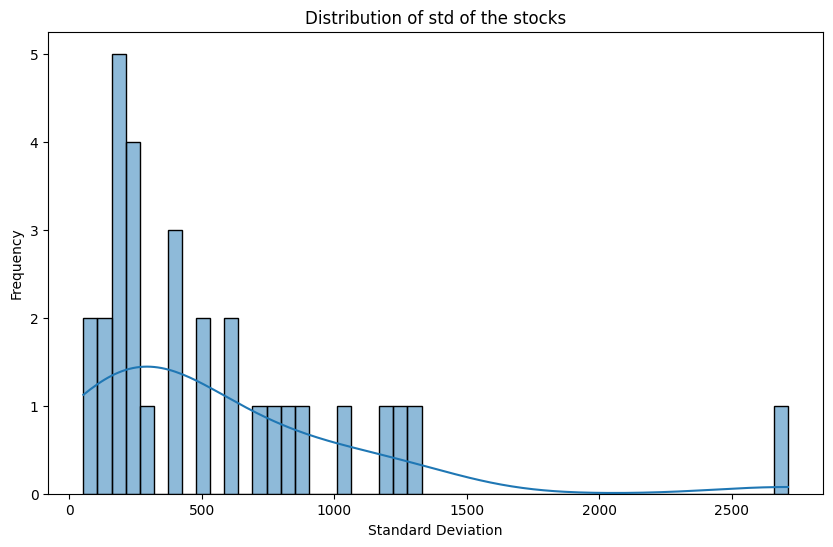

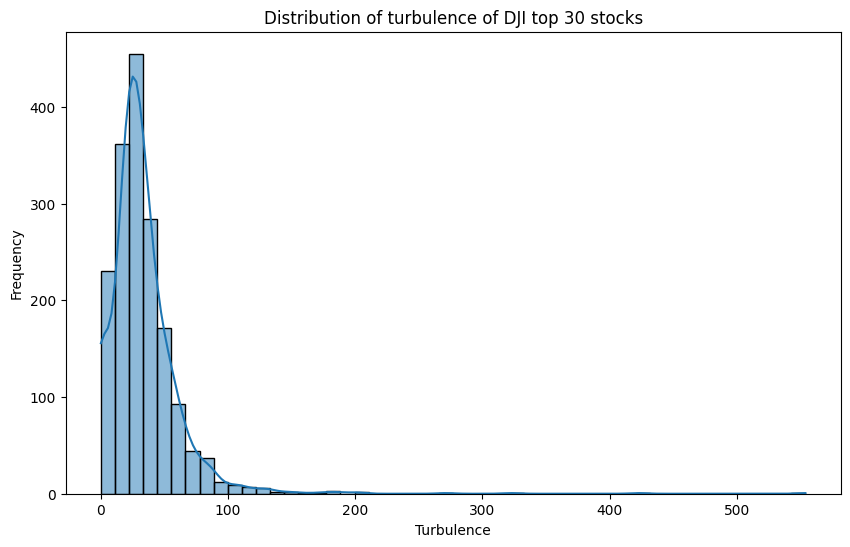

<Figure size 1500x500 with 0 Axes>

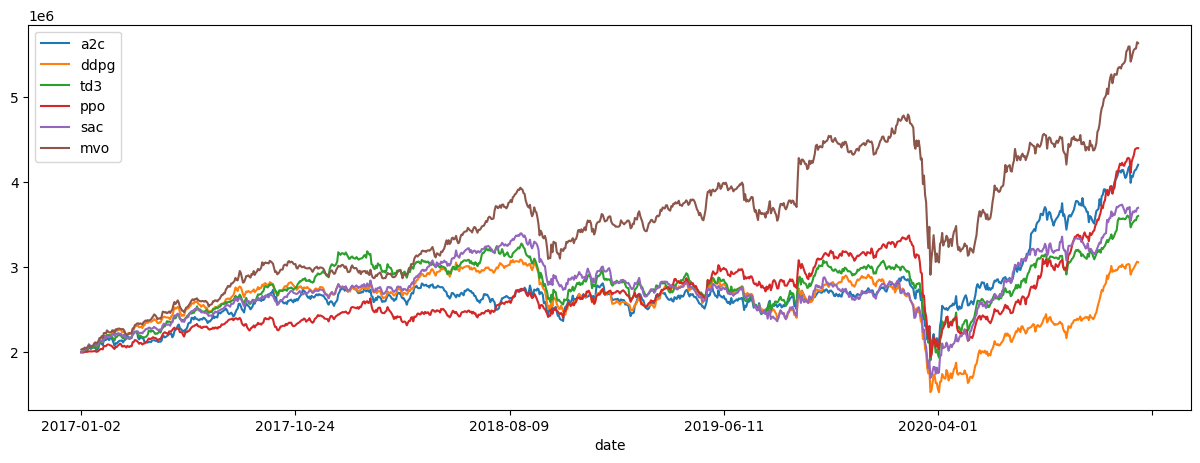

In [92]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [93]:
# make a table of initial and final value, annual return, sharpe ratio, max drawdown
# initial value
initial_value = result.iloc[0]
# final value
final_value = result.iloc[-1]
# annual return
annual_return = (final_value/initial_value)**(1/3) - 1
annual_return = annual_return * 100
# sharpe ratio
sharpe_ratio = annual_return / result.std()
# max drawdown
max_drawdown = (result - result.expanding().max()).min()
# combine all the metrics


In [94]:
# Calculate daily returns from the portfolio values
daily_returns = result.pct_change().dropna()

# Set target return (e.g., 0 for simplicity, or replace with a risk-free rate if needed)
target_return = 0

# Calculate downside deviation
downside_returns = daily_returns[daily_returns < target_return]  # Only returns below target
downside_deviation = np.sqrt((downside_returns**2).mean())  # Root mean square of negative returns

# Annual return (already calculated)
annual_return = (result.iloc[-1] / result.iloc[0])**(1/3) - 1
annual_return = annual_return * 100  # Convert to percentage

# Sortino Ratio
sortino_ratio = (annual_return - target_return) / downside_deviation

# # Create a DataFrame for Sortino Ratio
# sortino_ratio_df = pd.DataFrame(sortino_ratio, columns=['Sortino Ratio'])
# print(sortino_ratio_df)


In [95]:
metrics = pd.DataFrame([initial_value, final_value, annual_return, sharpe_ratio,sortino_ratio, max_drawdown], index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio','sortino_ratio', 'max_drawdown']).T

if os.name == 'nt':  # Windows
    # df_account_value_a2c.to_csv("NIFTY\df_account_value_a2c.csv")
    do_nothing = 0
else: # macOS/Linux
    metrics.to_csv("NIFTY/metrics_nifty.csv")
    
print(metrics)

      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  4.207553e+06      28.134637      0.000068    1963.459846   
ddpg   2.000000e+06  3.059905e+06      15.228345      0.000048     942.091869   
td3    2.000000e+06  3.604346e+06      21.692970      0.000068    1475.101833   
ppo    2.000000e+06  4.402781e+06      30.086536      0.000068    2013.245146   
sac    2.000000e+06  3.700297e+06      22.763393      0.000062    1645.144658   
mvo    2.029548e+06  5.639426e+06      40.587020      0.000054    2569.844409   

      max_drawdown  
a2c  -8.276996e+05  
ddpg -1.562628e+06  
td3  -1.375502e+06  
ppo  -1.427398e+06  
sac  -1.702375e+06  
mvo  -1.887909e+06  


# Risk (Maximum Drawdown)
------------------------

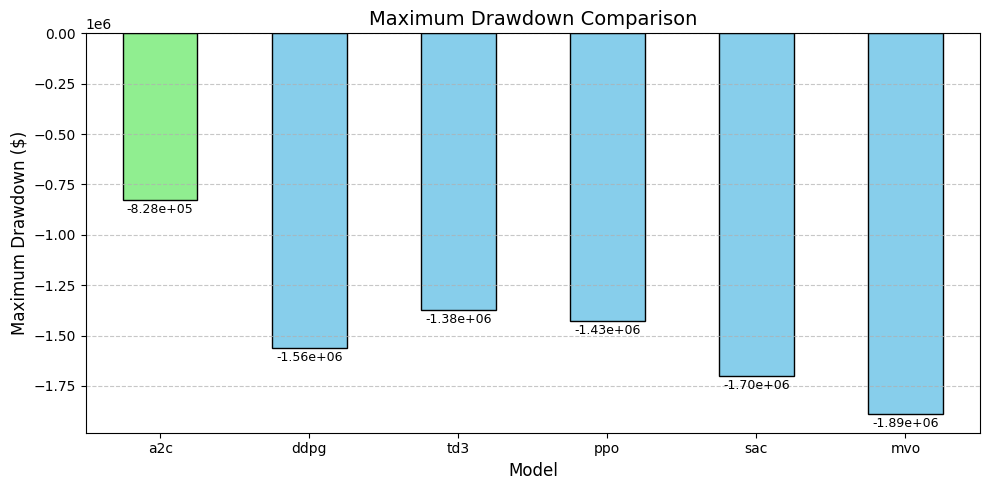

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created and saved
# metrics = pd.read_csv("metrics_cashless_snp500.csv", index_col=0)

# Calculate the maximum drawdowns from metrics
max_drawdowns = metrics['max_drawdown']

# Identify the index of the minimum absolute drawdown
min_drawdown_index = max_drawdowns.abs().idxmin()

# Define bar colors: light green for the lowest drawdown, sky blue for others
colors = ['lightgreen' if index == min_drawdown_index else 'skyblue' for index in max_drawdowns.index]

# Plot the maximum drawdowns
plt.figure(figsize=(10, 5))
max_drawdowns.plot(kind='bar', color=colors, edgecolor='black')

# Add titles and labels
plt.title('Maximum Drawdown Comparison', fontsize=14)
plt.ylabel('Maximum Drawdown ($)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(max_drawdowns):
    # Adjust the position of the text by subtracting a small offset
    offset = -0.025 * max_drawdowns.abs().max()  # 5% of the max absolute value as offset
    plt.text(index, value + offset, f'{value:.2e}', ha='center', va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('max_drawdown_comparison.png', dpi=300)
plt.show()


# Profitability
------------------

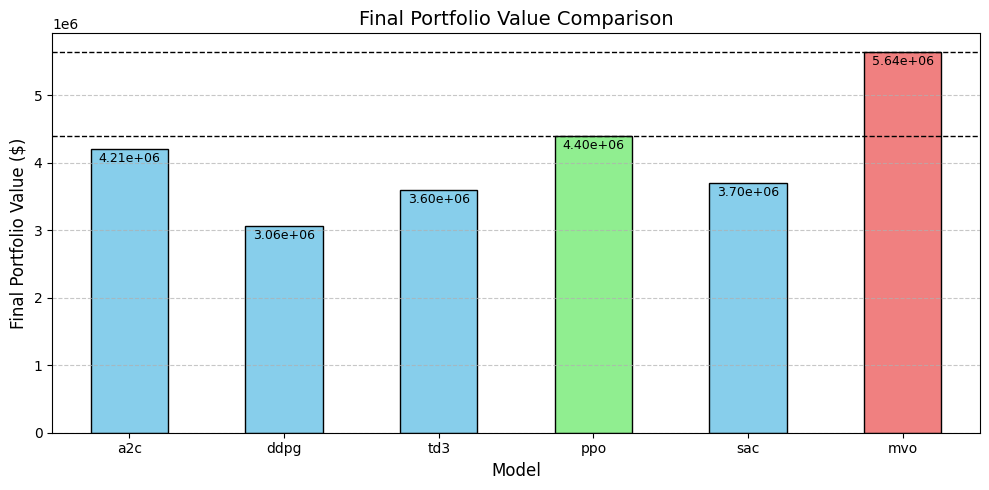

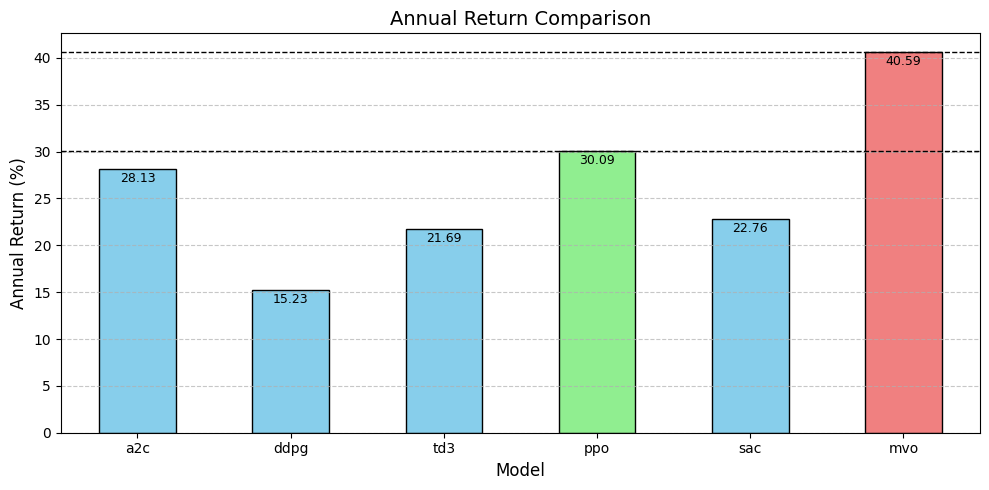

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created and saved

# Extract the final portfolio values and annual returns from metrics
final_values = metrics['final_value']
annual_returns = metrics['annual_return']

# Identify the index of the maximum and second maximum final value and annual return
max_final_value_index = final_values.idxmax()
second_max_final_value_index = final_values.nlargest(2).idxmin()
max_annual_return_index = annual_returns.idxmax()
second_max_annual_return_index = annual_returns.nlargest(2).idxmin()

# Define bar colors: light coral for the highest value, light green for the second highest, sky blue for others
colors_final_value = [
    'lightcoral' if index == max_final_value_index else 'lightgreen' if index == second_max_final_value_index else 'skyblue'
    for index in final_values.index
]
colors_annual_return = [
    'lightcoral' if index == max_annual_return_index else 'lightgreen' if index == second_max_annual_return_index else 'skyblue'
    for index in annual_returns.index
]

# Plot the final portfolio values
plt.figure(figsize=(10, 5))
final_values.plot(kind='bar', color=colors_final_value, edgecolor='black')

# Add titles and labels
plt.title('Final Portfolio Value Comparison', fontsize=14)
plt.ylabel('Final Portfolio Value ($)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(final_values):
    offset = -0.025 * final_values.max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2e}', ha='center', va='center', fontsize=9)

# Draw black dotted lines for the highest and second-highest final values
plt.axhline(y=final_values[max_final_value_index], color='black', linestyle='--', linewidth=1)
plt.axhline(y=final_values[second_max_final_value_index], color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('final_value_comparison.png', dpi=300)
plt.show()

# Plot the annual returns
plt.figure(figsize=(10, 5))
annual_returns.plot(kind='bar', color=colors_annual_return, edgecolor='black')

# Add titles and labels
plt.title('Annual Return Comparison', fontsize=14)
plt.ylabel('Annual Return (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(annual_returns):
    offset = -0.025 * annual_returns.max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Draw black dotted lines for the highest and second-highest annual returns
plt.axhline(y=annual_returns[max_annual_return_index], color='black', linestyle='--', linewidth=1)
plt.axhline(y=annual_returns[second_max_annual_return_index], color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('annual_return_comparison.png', dpi=300)
plt.show()


# Consistency (Volatility of Returns)
------------------------

In [98]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Count the number of trading days per year
trading_days_per_year = df.groupby('year')['date'].nunique()

# Display the result
print(trading_days_per_year)


year
2010    250
2011    246
2012    245
2013    248
2014    244
2015    246
2016    246
2017    248
2018    246
2019    243
2020    251
Name: date, dtype: int64


In [99]:
# Calculate daily returns
daily_returns = result.pct_change().dropna()

# Calculate annualized volatility
volatility = daily_returns.std() * np.sqrt(252)  # 252 trading days assumed for a year

# Add volatility to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility']
).T

# Save and display metrics
metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)




      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  4.207553e+06      28.134637      0.000068    1963.459846   
ddpg   2.000000e+06  3.059905e+06      15.228345      0.000048     942.091869   
td3    2.000000e+06  3.604346e+06      21.692970      0.000068    1475.101833   
ppo    2.000000e+06  4.402781e+06      30.086536      0.000068    2013.245146   
sac    2.000000e+06  3.700297e+06      22.763393      0.000062    1645.144658   
mvo    2.029548e+06  5.639426e+06      40.587020      0.000054    2569.844409   

      max_drawdown  volatility  
a2c  -8.276996e+05    0.227864  
ddpg -1.562628e+06    0.238911  
td3  -1.375502e+06    0.228016  
ppo  -1.427398e+06    0.219158  
sac  -1.702375e+06    0.218268  
mvo  -1.887909e+06    0.232719  


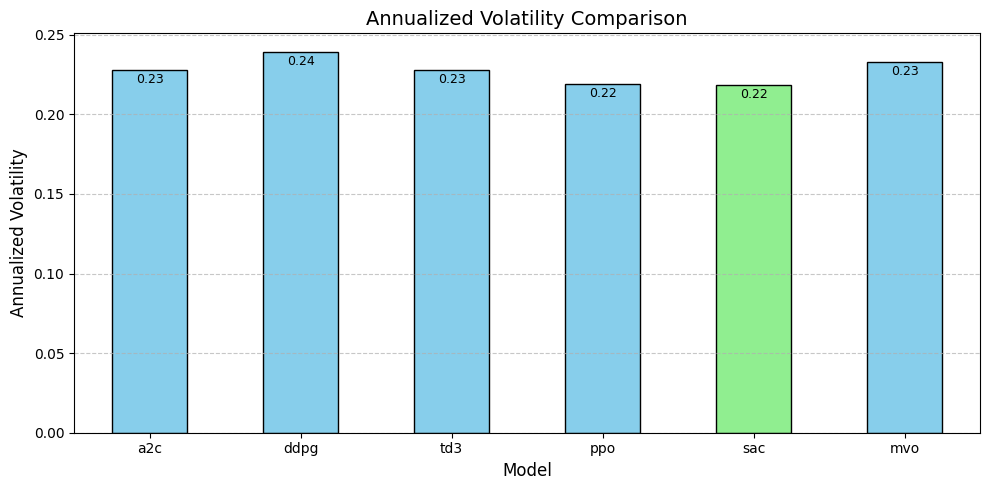

In [100]:
# Define bar colors: light green for the lowest value, sky blue for others
colors_volatility = ['lightgreen' if value == metrics['volatility'].min() else 'skyblue' for value in metrics['volatility']]

# Plot the volatility comparison
plt.figure(figsize=(10, 5))
metrics['volatility'].plot(kind='bar', color=colors_volatility, edgecolor='black')

# Add titles and labels
plt.title('Annualized Volatility Comparison', fontsize=14)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['volatility']):
    offset = -0.025 * metrics['volatility'].max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('volatility_comparison.png', dpi=300)
plt.show()


# Aggresiveness
--------------

In [ ]:
# Calculate profitability
profitability = metrics['final_value'] - metrics['initial_value']

# Calculate aggressiveness
aggressiveness = profitability / metrics['max_drawdown']

# Add aggressiveness to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility, profitability, aggressiveness],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility', 'profitability', 'aggressiveness']
).T

# Save and display metrics
# metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)



In [ ]:
# Plot the aggressiveness comparison
plt.figure(figsize=(10, 5))
metrics['aggressiveness'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Aggressiveness Comparison', fontsize=14)
plt.ylabel('Aggressiveness', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['aggressiveness']):
    offset = -0.085 * metrics['aggressiveness'].max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Show grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('aggressiveness_comparison.png', dpi=300)
plt.show()


# Drawdown Recovery Time
-------------------------

In [ ]:
# calculate drawdown recovery time for a2c using df_account_value_a2c

# 1. identift maximum and minimum portfolio value
max_portfolio_value = df_account_value_a2c['account_value'].max()
min_portfolio_value = df_account_value_a2c['account_value'].min()

# 2. calculate drawdown
drawdown = (max_portfolio_value - min_portfolio_value)

# 3. Find recovery date
recovery_date = df_account_value_a2c[df_account_value_a2c['account_value'] == max_portfolio_value].index[0]

# 4. Find lowest point date
lowest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == min_portfolio_value].index[0]

# 5. Find drawdown recovery time
drawdown_recovery_time = recovery_date - lowest_point_date

# 6. Display the dates
print(f"Lowest Point Date: {lowest_point_date}")
print(f"Recovery Date: {recovery_date}")

# 7. Display the drawdown and recovery time
print(f"Drawdown: {drawdown:.2f}")
print(f"Drawdown Recovery Time: {drawdown_recovery_time} days")








In [ ]:
from datetime  import datetime

# 1. Identifying maximum and minimum portfolio value
max_portfolio_value = df_account_value_a2c['account_value'].max()
min_portfolio_value = df_account_value_a2c['account_value'].min()

# 2. Calculate drawdown
drawdown = (max_portfolio_value - min_portfolio_value)

# 3. Find recovery date
highest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == max_portfolio_value]['date'].iloc[0]

# 4. Find lowest point date
lowest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == min_portfolio_value]['date'].iloc[0]

# 5. Find drawdown recovery time (in days)

# Convert strings to datetime objects
highest_point_date_dt = datetime.strptime(highest_point_date, '%Y-%m-%d')
lowest_point_date_dt = datetime.strptime(lowest_point_date, '%Y-%m-%d')
# Calculate the difference in days
days_difference = (highest_point_date_dt - lowest_point_date_dt).days

print(f"Lowest Point Date: {lowest_point_date}")
print(f"Highest Point Date: {highest_point_date}")
print(f"Drawdown Recovery Time: {days_difference} days")


In [ ]:
from datetime import datetime

def calculate_recovery_time(arg_df, algorithm_name):
    

    # 1. Identifying maximum and minimum portfolio value
    max_portfolio_value = arg_df['account_value'].max()
    min_portfolio_value = arg_df['account_value'].min()

    # 2. Calculate drawdown
    drawdown = max_portfolio_value - min_portfolio_value

    # 3. Find recovery date
    highest_point_date = arg_df[arg_df['account_value'] == max_portfolio_value]['date'].iloc[0]


    # 4. Find lowest point date
    lowest_point_date = arg_df[arg_df['account_value'] == min_portfolio_value]['date'].iloc[0]

    # 5. Find drawdown recovery time (in days)
    highest_point_date_dt = datetime.strptime(highest_point_date, '%Y-%m-%d')
    lowest_point_date_dt = datetime.strptime(lowest_point_date, '%Y-%m-%d')

    # Calculate the difference in days
    drt = (highest_point_date_dt - lowest_point_date_dt).days

    return {
        'algorithm': algorithm_name,
        'drawdown': drawdown,
        'max_portfolio_value': max_portfolio_value,
        'highest_point_date': highest_point_date,
        'min_portfolio_value': min_portfolio_value,
        'lowest_point_date': lowest_point_date,
        'recovery_time': drt
    }

# Example usage for PPO
ppo_recovery = calculate_recovery_time(df_account_value_ppo, 'ppo')
print(ppo_recovery)



In [ ]:

copy_result = result.copy()
df_account_value_mvo_temp = copy_result.drop(columns=['a2c', 'ddpg', 'td3', 'ppo', 'sac'])
df_account_value_mvo_temp 


In [ ]:
df_account_value_mvo = df_account_value_mvo_temp.reset_index()  # Reset the index to convert dates to a column
df_account_value_mvo.columns = ['date', 'account_value']  # Rename the columns
df_account_value_mvo

In [ ]:
a2c_recovery = calculate_recovery_time(df_account_value_a2c, 'a2c')
ddpg_recovery = calculate_recovery_time(df_account_value_ddpg, 'ddpg')
td3_recovery = calculate_recovery_time(df_account_value_td3, 'td3')
ppo_recovery = calculate_recovery_time(df_account_value_ppo, 'ppo')
sac_recovery = calculate_recovery_time(df_account_value_sac, 'sac')
mvo_recovery = calculate_recovery_time(df_account_value_mvo, 'mvo')

# Display the recovery time for each model
print(a2c_recovery)
print(ddpg_recovery)
print(td3_recovery)
print(ppo_recovery)
print(sac_recovery)
print(mvo_recovery)


In [ ]:
# make a array of all the recovery time
recovery_times = [a2c_recovery['recovery_time'], ddpg_recovery['recovery_time'], td3_recovery['recovery_time'], ppo_recovery['recovery_time'], sac_recovery['recovery_time'], mvo_recovery['recovery_time']]
recovery_times

In [ ]:
metrics['recovery_time'] = recovery_times
# metrics.to_csv("metrics_cashless_snp500.csv")

metrics 

In [ ]:
# Plot the recovery time comparison
plt.figure(figsize=(10, 5))
metrics['recovery_time'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Recovery Time Comparison', fontsize=14)
plt.ylabel('Recovery Time (days)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['recovery_time']):
    offset = 0.035 * metrics['recovery_time'].max()  # 3.5% of the max value as offset
    plt.text(index, value + offset, f'{value}', ha='center', va='center', fontsize=9)

# Add a red dotted line across y=0
plt.axhline(y=0, color='black', linestyle='dotted', linewidth=1.5)

# Show grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('recovery_time_comparison.png', dpi=300)
plt.show()


# HeatMap
----------

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created
# metrics = pd.read_csv("metrics_cashless_snp500.csv")

# Selecting relevant columns for heatmap
metrics_subset = metrics[['annual_return', 'sharpe_ratio', 'sortino_ratio', 
                         'max_drawdown', 'volatility', 'profitability', 
                         'aggressiveness', 'recovery_time']]

# Normalize data if needed
metrics_normalized = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0,
                      cbar_kws={'label': 'Normalized Value'},
                      linewidths=0.5)

# Title and labels
plt.title('Comparison of Different Algorithms Across Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Algorithms', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


In [ ]:
# create the same heatmap but without the mvo model

# Selecting relevant columns for heatmap
metrics_subset = metrics[['annual_return', 'sharpe_ratio', 'sortino_ratio', 
                         'max_drawdown', 'volatility', 'profitability', 
                         'aggressiveness', 'recovery_time']].drop('mvo')

# Normalize data if needed
metrics_normalized = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0,
                      cbar_kws={'label': 'Normalized Value'},
                      linewidths=0.5)

# Title and labels
plt.title('Comparison of Different Algorithms Across Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Algorithms', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


# Radar Plot
----------------

In [ ]:
print(metrics) 
# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

metrics_subset = metrics.loc[algorithms, ['final_value','annual_return', 'sharpe_ratio', 'sortino_ratio', 
                                          'max_drawdown', 'volatility', 'profitability', 
                                          'aggressiveness', 'recovery_time']]

metrics_subset



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

# Extract metrics for all algorithms
metrics_subset = metrics.loc[algorithms, ['annual_return', 'sharpe_ratio'   , 'final_value', 
                                          'sortino_ratio', 'max_drawdown'   , 'volatility', 
                                          'profitability', 'aggressiveness' , 'recovery_time']]

# Normalize metrics
metrics_norm = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Number of variables
num_vars = len(metrics_norm.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each algorithm
for algo, color in zip(algorithms, colors):
    metrics_values = metrics_norm.loc[algo].values.tolist()
    metrics_values += metrics_values[:1]  # Close the circle

    # Plot
    ax.plot(angles, metrics_values, linewidth=2, linestyle='solid', color=color, label=algo)

    # Fill area
    ax.fill(angles, metrics_values, color=color, alpha=0.25)

# Customize
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_norm.columns.tolist(), fontsize=10)

# Legend with adjusted position
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.20), fontsize=10, title="Algorithms")

# Title
plt.title('Normalized Performance Comparison Across Algorithms', fontsize=12, y=1.10)

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'metrics' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac']

# Extract metrics for all algorithms
metrics_subset = metrics.loc[algorithms, ['annual_return', 'sharpe_ratio'   , 'final_value', 
                                          'sortino_ratio', 'max_drawdown'   , 'volatility', 
                                          'profitability', 'aggressiveness' , 'recovery_time']]

# # Normalize metrics
# metrics_norm = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Number of variables
num_vars = len(metrics_norm.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each algorithm
for algo, color in zip(algorithms, colors):
    metrics_values = metrics_norm.loc[algo].values.tolist()
    metrics_values += metrics_values[:1]  # Close the circle

    # Plot
    ax.plot(angles, metrics_values, linewidth=2, linestyle='solid', color=color, label=algo)

    # Fill area
    ax.fill(angles, metrics_values, color=color, alpha=0.25)

# Customize
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_norm.columns.tolist(), fontsize=10)

# Legend with adjusted position
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.20), fontsize=10, title="Algorithms")

# Title
plt.title('Not-Normalized Performance Comparison Across Algorithms', fontsize=12, y=1.10)

# Show plot
plt.tight_layout()
plt.show()
